In [ ]:
import scvelo as scv

In [ ]:
scv.settings.set_figure_params('scvelo', dpi_save=400, dpi=80, transparent=True, fontsize=20, color_map='viridis')
scv.settings.plot_prefix = ""

In [3]:
adata = scv.read('adata_gv.h5ad')
adata

AnnData object with n_obs × n_vars = 9815 × 2000
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes', 'mack_score'
    uns: 'celltype_colors', 'gv_params', 'log1p', 'neighbors', 'pca', 'recover_dynamics', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap', 'gv_pca', 'gv_umap', 'velocity_umap'
    varm: 'PCs', 'loss'
    layers: 'Ms', 'Mu', 'fit_t', 'f

In [4]:
genes=['Blvrb', 'Mllt3', 'Hbb-y', 'Slc4a1', 'Pklr']

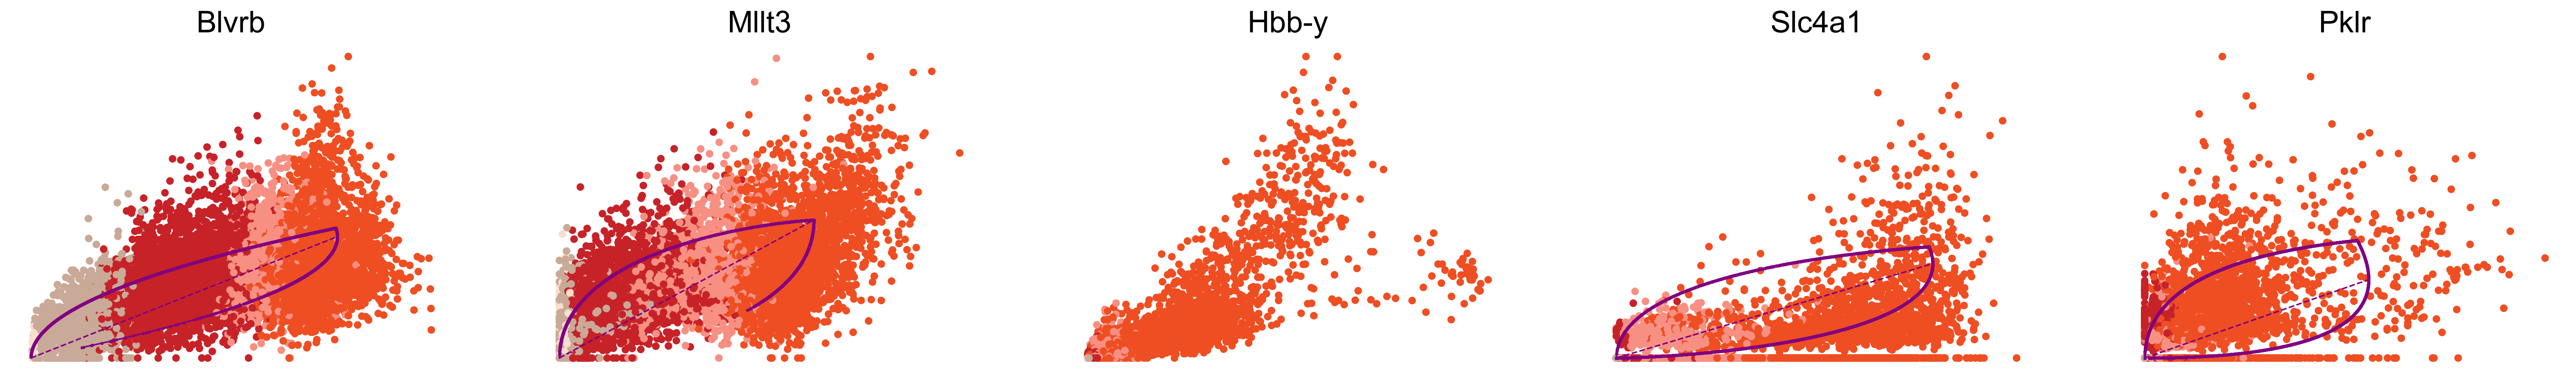

In [5]:
fig_kwargs = {'basis': genes, 'color': 'celltype', 'frameon': False, 'ncols': 5, 's': 100, 'dpi': 150}
scv.pl.scatter(adata, **fig_kwargs)

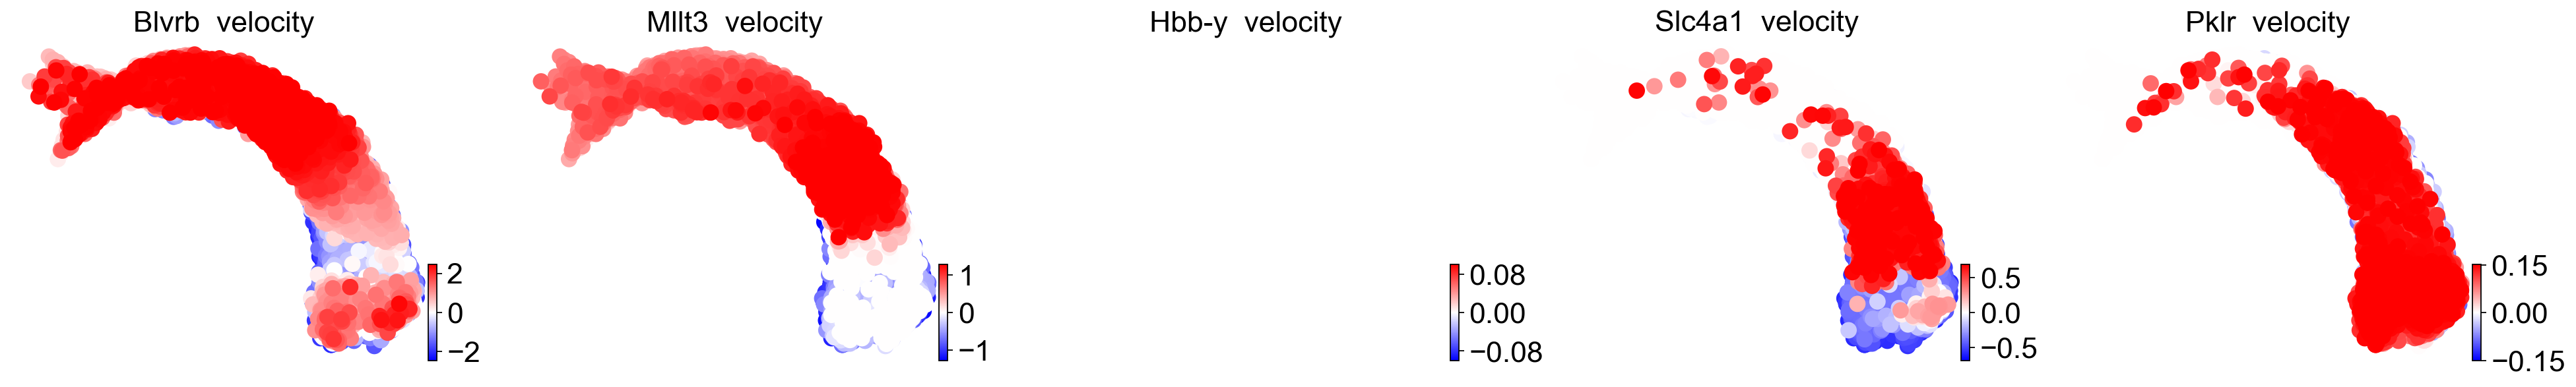

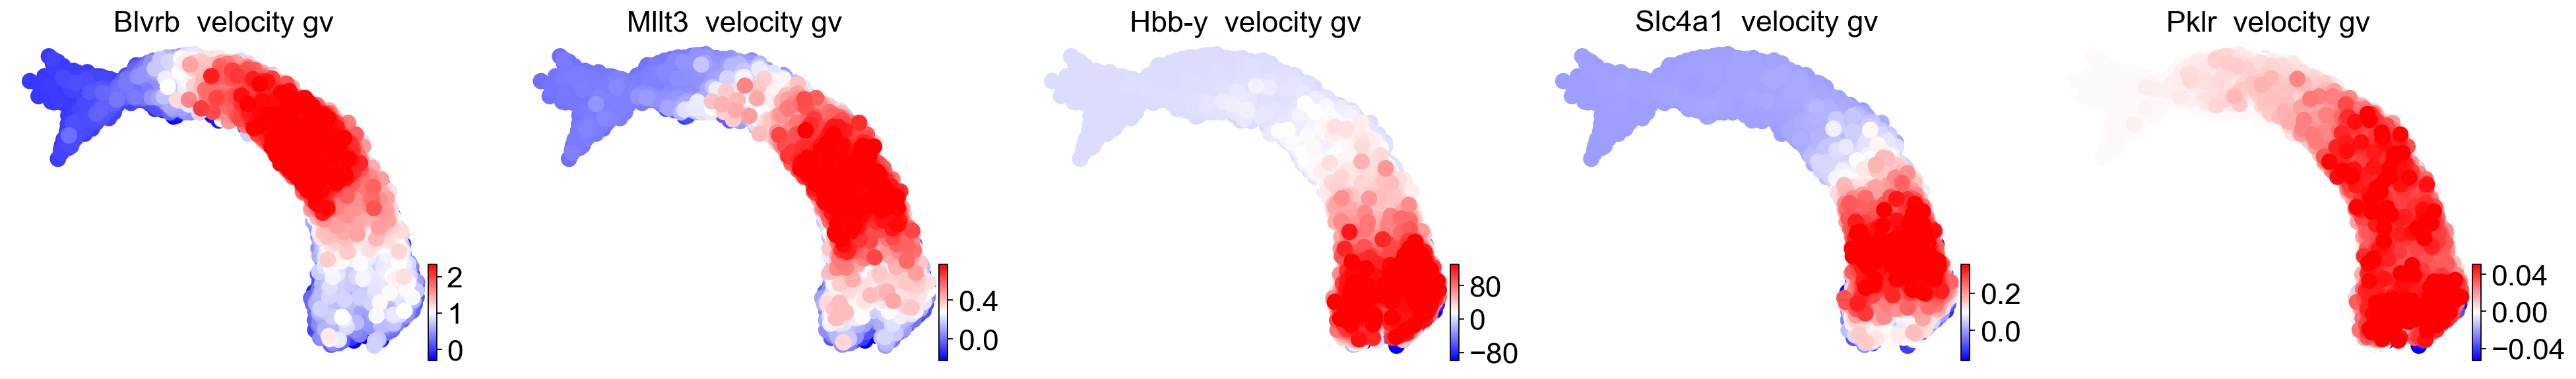

In [6]:
fig_kwargs = {'color': genes, 'size': 500, 'color_map': 'bwr', 'ncols': 5}
scv.pl.scatter(adata, layer='velocity', **fig_kwargs)
scv.pl.scatter(adata, layer='velocity_gv', **fig_kwargs)

In [7]:
adata_murk = adata[:, adata.var['MURK_gene']].copy()
adata_murk

AnnData object with n_obs × n_vars = 9815 × 68
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes', 'mack_score'
    uns: 'celltype_colors', 'gv_params', 'log1p', 'neighbors', 'pca', 'recover_dynamics', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap', 'gv_pca', 'gv_umap', 'velocity_umap'
    varm: 'PCs', 'loss'
    layers: 'Ms', 'Mu', 'fit_t', 'fit

In [8]:
scv.tl.velocity_graph(adata_murk)
scv.tl.velocity_graph(adata_murk, vkey='velocity_gv')

computing velocity graph (using 1/10 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 1/10 cores)
    finished (0:00:02) --> added 
    'velocity_gv_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_gv_umap', embedded velocity vectors (adata.obsm)


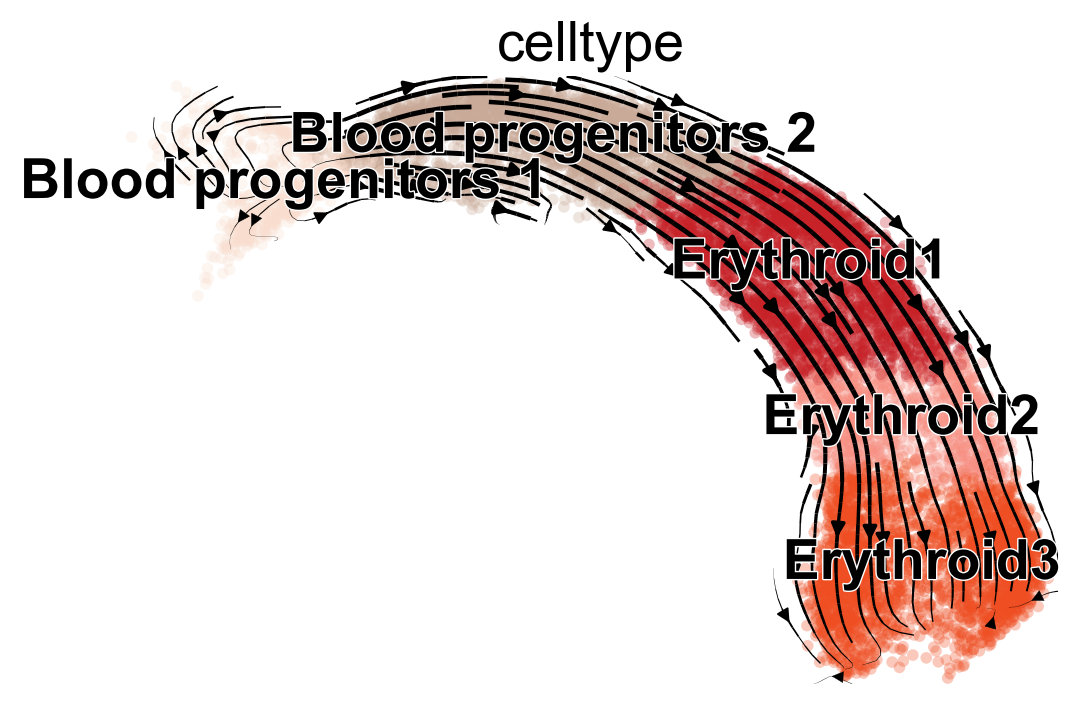

In [ ]:
fig_kwargs = {'color': 'celltype', 'dpi': 100, 'legend_loc': 'on data', 's': 70}
scv.pl.velocity_embedding_stream(adata_murk, vkey='velocity_gv', **fig_kwargs)

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


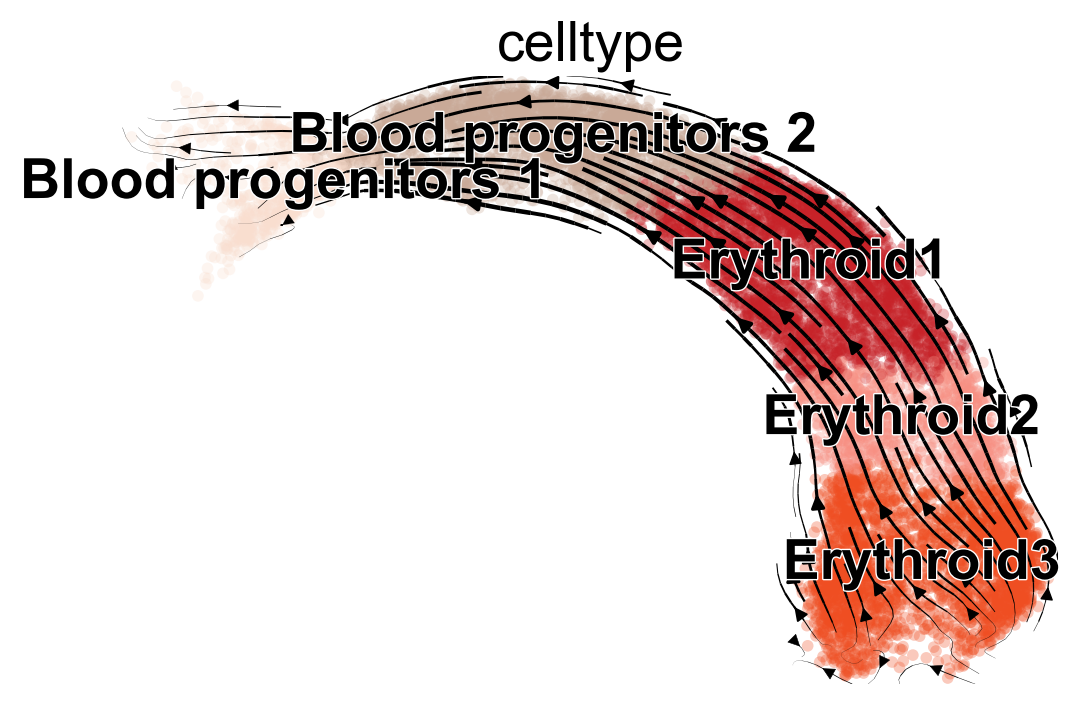

In [10]:
fig_kwargs = {'color': 'celltype', 'dpi': 100, 'legend_loc': 'on data', 's': 70}
scv.pl.velocity_embedding_stream(adata_murk, **fig_kwargs)